# Hey folks, how are you all, I hope everyone is healthy and happy, Ok let's get into the subject, today we will do data analysis on world population data and get insights from it.

In [3]:
# Let's import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Now, load the data

df = pd.read_csv('/content/Wolrd Population Data.csv')
print(df)


     Rank           Country Population (2024) Yearly Change  Net Change  \
0       1             India     1,450,935,791        0.89 %  12,866,195   
1       2             China     1,419,321,278       -0.23 %  -3,263,655   
2       3     United States       345,426,571        0.57 %   1,949,236   
3       4         Indonesia       283,487,931        0.82 %   2,297,864   
4       5          Pakistan       251,269,164        1.52 %   3,764,669   
..    ...               ...               ...           ...         ...   
229   230        Montserrat             4,389       -0.70 %         -31   
230   231  Falkland Islands             3,470       -0.20 %          -7   
231   232           Tokelau             2,506        4.55 %         109   
232   233              Niue             1,819        0.11 %           2   
233   234          Holy See               496        0.00 %           0   

    Density (P/Km²) Land Area (Km²) Migrants (net)  Fert. Rate  Med. Age  \
0               488    

In [6]:
#Here, we just check first 5 rows, if you want it for last 5 rows then df.tail(5)
df.head(5)

,Rank,Country,Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,"1,450,935,791",0.89 %,"12,866,195",488,"2,973,190","-630,830",2.0,28,37 %,17.78 %
1,2,China,"1,419,321,278",-0.23 %,"-3,263,655",151,"9,388,211","-318,992",1.0,40,66 %,17.39 %
2,3,United States,"345,426,571",0.57 %,"1,949,236",38,"9,147,420","1,286,132",1.6,38,82 %,4.23 %
3,4,Indonesia,"283,487,931",0.82 %,"2,297,864",156,"1,811,570","-38,469",2.1,30,59 %,3.47 %
4,5,Pakistan,"251,269,164",1.52 %,"3,764,669",326,"770,880","-1,401,173",3.5,20,34 %,3.08 %


In [7]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               234 non-null    int64  
 1   Country            234 non-null    object 
 2   Population (2024)  234 non-null    object 
 3   Yearly Change      234 non-null    object 
 4   Net Change         234 non-null    object 
 5   Density (P/Km²)    234 non-null    object 
 6   Land Area (Km²)    234 non-null    object 
 7   Migrants (net)     234 non-null    object 
 8   Fert. Rate         234 non-null    float64
 9   Med. Age           234 non-null    int64  
 10  Urban Pop %        234 non-null    object 
 11  World Share        234 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 22.1+ KB


In [8]:
#To check, how many rows and cols in the dataset -> there are 12 cols and 234 rows in the dataset.
df.shape

(234, 12)

In [9]:
#check for any missing values in the dataset
df.isnull().sum()

,0
Rank,0
Country,0
Population (2024),0
Yearly Change,0
Net Change,0
Density (P/Km²),0
Land Area (Km²),0
Migrants (net),0
Fert. Rate,0
Med. Age,0


In [10]:
# Check duplicates
print("\
Number of duplicate rows:", len(df[df.duplicated()]))

Number of duplicate rows: 0


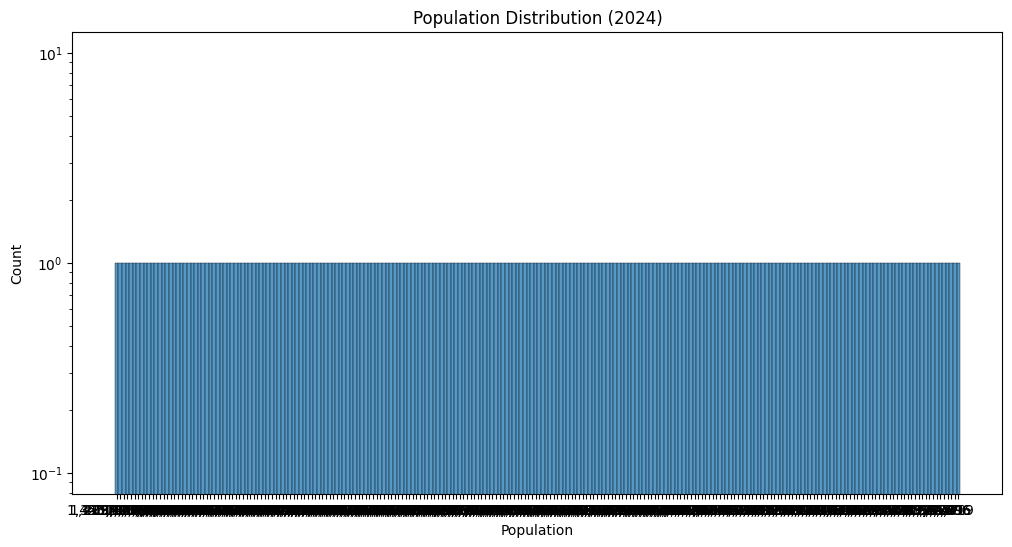

In [14]:
# ok, we see our data is clean, so, now let's do vizualization!

# Create a population distribution visualization
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Population (2024)', bins=50)
plt.title('Population Distribution (2024)')
plt.xlabel('Population')
plt.yscale('log')
plt.show()




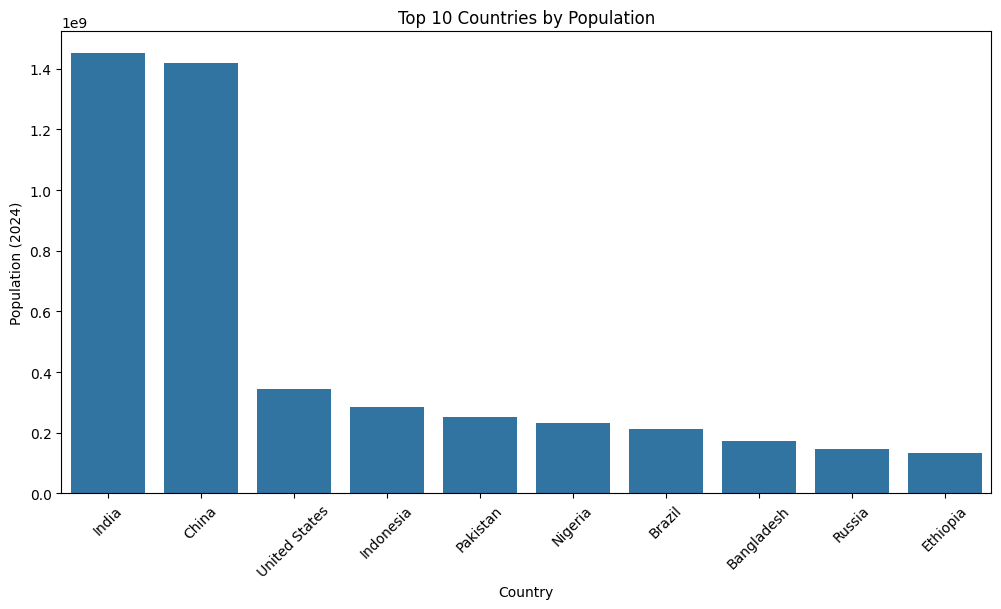

In [17]:
# Top 10 countries by population
plt.figure(figsize=(12, 6))
top_10 = df.nlargest(10, 'Population (2024)')
sns.barplot(data=top_10, x='Country', y='Population (2024)')
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Population')
plt.show()

In [16]:
# Above code, we are getting the error.

# Method 1: Use pd.to_numeric()
df['Population (2024)'] = pd.to_numeric(df['Population (2024)'].str.replace(',', ''), errors='coerce')

# Method 2: Remove commas and convert
# df['Population (2024)'] = df['Population (2024)'].str.replace(',', '').astype(float)

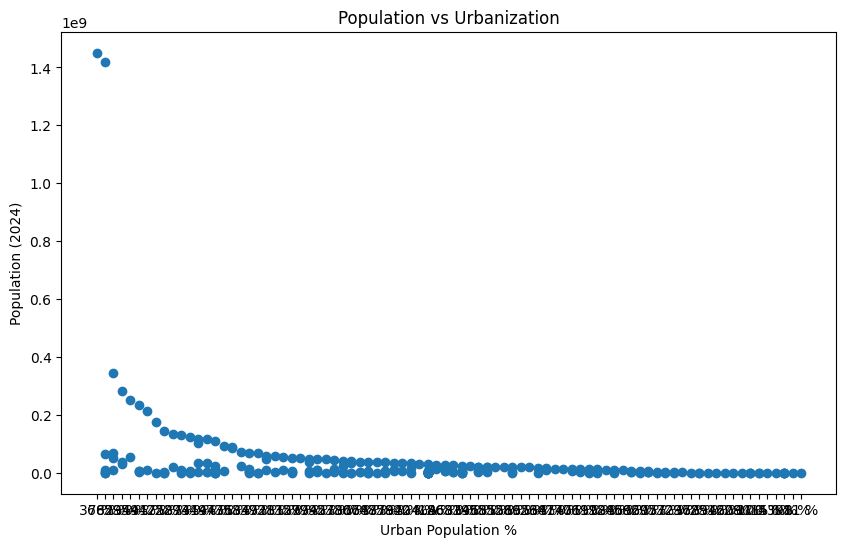

In [22]:
# Population vs Urban Population %
plt.figure(figsize=(10, 6))
plt.scatter(df['Urban Pop %'], df['Population (2024)'])
plt.xlabel('Urban Population %')
plt.ylabel('Population (2024)')
plt.title('Population vs Urbanization')
plt.show()

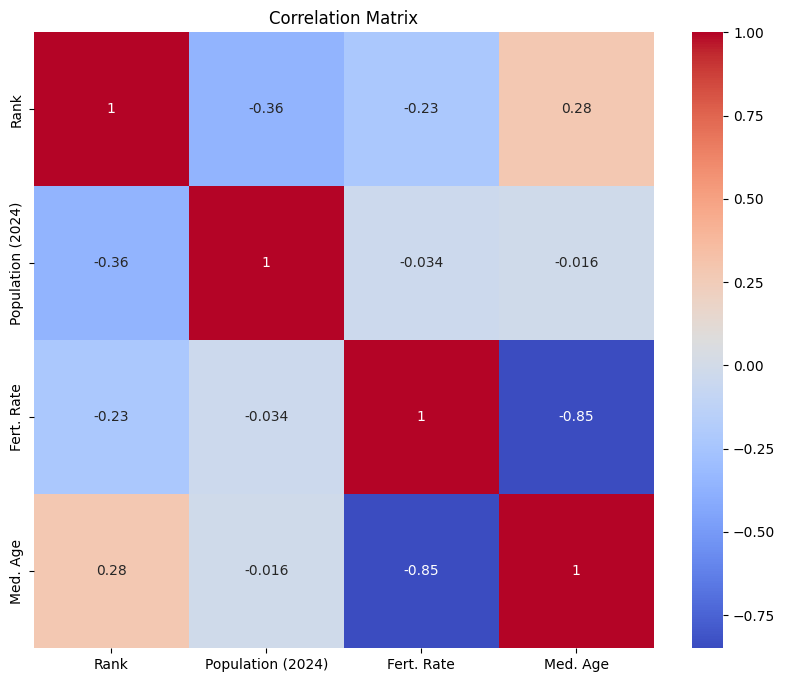

In [23]:
# Correlation between numeric columns
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

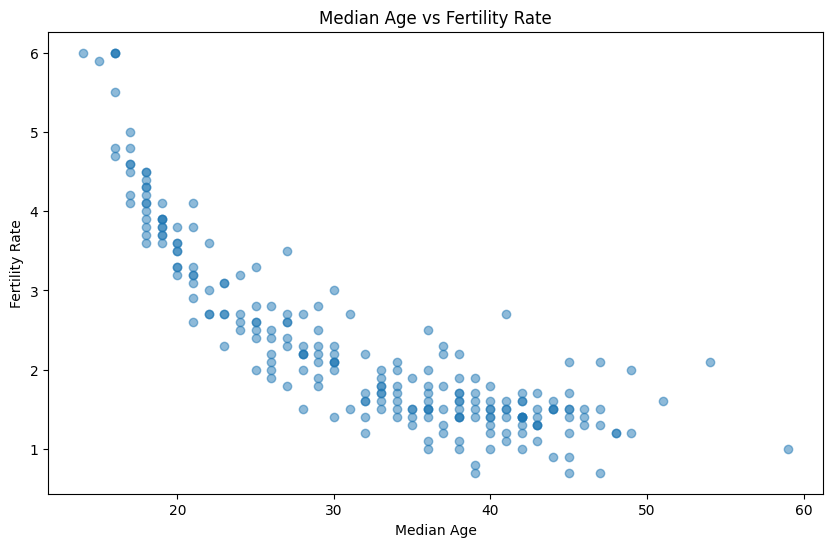

In [24]:
# Age vs Fertility Analysis
plt.figure(figsize=(10, 6))
plt.scatter(df['Med. Age'], df['Fert. Rate'], alpha=0.5)
plt.xlabel('Median Age')
plt.ylabel('Fertility Rate')
plt.title('Median Age vs Fertility Rate')
plt.show()

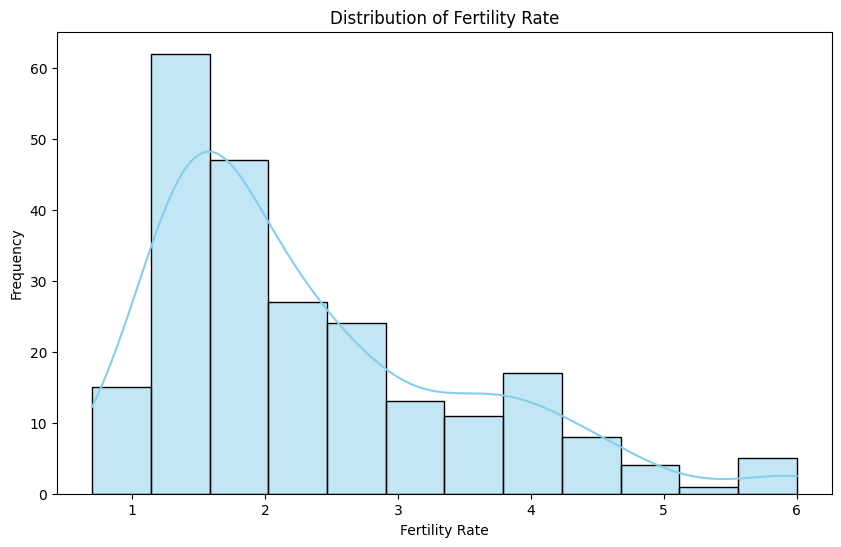

In [29]:
# Distribution of Fertility Rate
plt.figure(figsize=(10, 6))
sns.histplot(df['Fert. Rate'].dropna(), kde=True, color='skyblue')
plt.title('Distribution of Fertility Rate')
plt.xlabel('Fertility Rate')
plt.ylabel('Frequency')
plt.show()

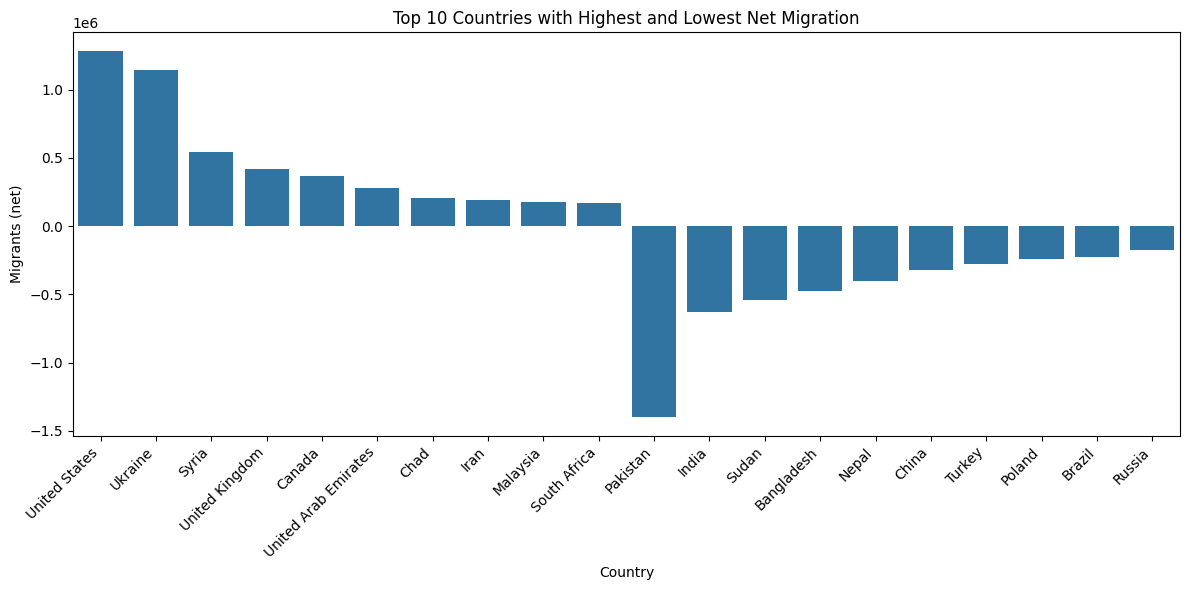

In [31]:
# Migration Analysis
plt.figure(figsize=(12, 6))
# Convert 'Migrants (net)' column to numeric, handling errors
df['Migrants (net)'] = pd.to_numeric(df['Migrants (net)'].str.replace(',', ''), errors='coerce')
top_migrants = df.nlargest(10, 'Migrants (net)')
bottom_migrants = df.nsmallest(10, 'Migrants (net)')
migration_data = pd.concat([top_migrants, bottom_migrants])
sns.barplot(data=migration_data, x='Country', y='Migrants (net)')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Countries with Highest and Lowest Net Migration')
plt.tight_layout()
plt.show()

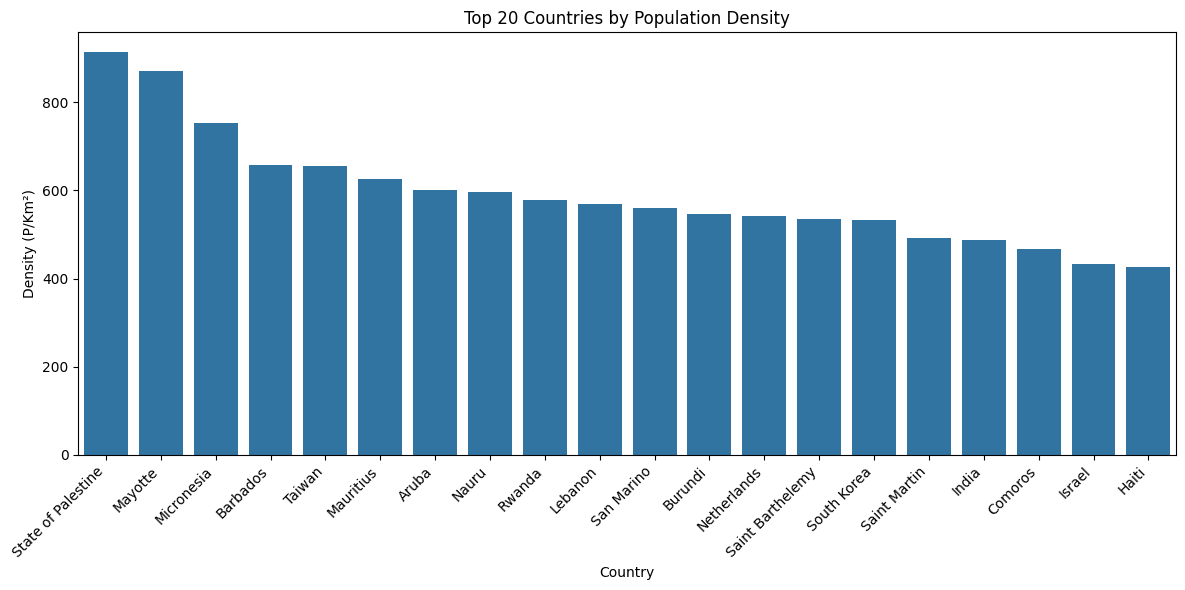

In [33]:
# Population Density Distribution
plt.figure(figsize=(12, 6))
# Convert 'Density (P/Km²)' to numeric before applying nlargest
df['Density (P/Km²)'] = pd.to_numeric(df['Density (P/Km²)'], errors='coerce')
top_20_density = df.nlargest(20, 'Density (P/Km²)')
sns.barplot(data=top_20_density, x='Country', y='Density (P/Km²)')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Countries by Population Density')
plt.tight_layout()
plt.show()

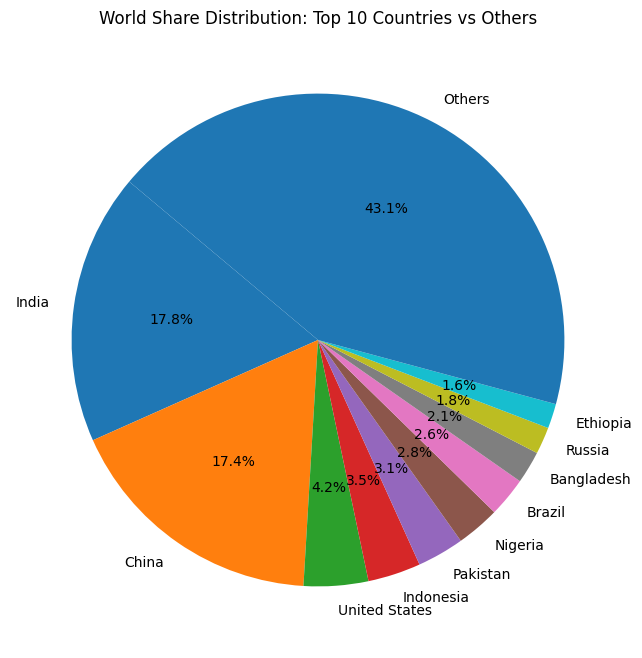

Pie chart for World Share is generated.


In [35]:
# Create pie chart for World Share: top 10 countries and 'Others'

# Convert 'World Share' to numeric before applying nlargest
df['World Share'] = pd.to_numeric(df['World Share'].str.replace('%', ''), errors='coerce')

top10 = df.nlargest(10, 'World Share')
top10_share = top10['World Share']
top10_labels = top10['Country']

others_share = 100 - top10_share.sum()

# Create updated labels and shares
labels = list(top10_labels) + ['Others']
shares = list(top10_share) + [others_share]

plt.figure(figsize=(8, 8))
plt.pie(shares, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('World Share Distribution: Top 10 Countries vs Others')
plt.show()

print('Pie chart for World Share is generated.')

# That's all. Thanks for making it to the last!